In [2]:
import os
import cv2 
import numpy as np
import pandas as pd
import tensorflow as tf
import easyocr
import matplotlib.pyplot as plt
import pytesseract as pt
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
import matplotlib.pyplot as plt
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from datetime import datetime

# os module provides various functions to interact with the file system, manage directories, and perform other operating system-related tasks.
# cv2  computer vision tasks. It provides various functions for image and video processing.
# numpy scientific computing , large multiD. arrays and matrixes
# pandas powerful and easy-to-use data analysis and manipulation library in Python
# TensorFlow is an open-source machine learning framework , creating a basic neural network
# easyocr optical character recognisation
# matplotlib creating plots, histograms, power spectra, bar charts, error charts, scatterplots

# glob is a module in Python that provides a function by the same name for searching for files that match a specified pattern.
 # It is commonly used to retrieve a list of file paths that match a specified pattern.
# io is a submodule of the skimage (scikit-image) module, which is a collection of algorithms for image processing.
 # It provides various functions for reading, saving, and displaying images.
 # Functions in the io submodule can handle various image formats, making it easy to work with images in different formats within the scikit-image ecosystem.
# copy is a function provided by the shutil (shell utilities) module in Python.
 #  It is used to copy files or directories from one location to another.
 #  The copy function can be used to create a duplicate of a file or directory, and it preserves the file metadata while copying.

In [3]:
# import os

# # Define the directory path
# directory = 'D:\\automatic-number-plate-recognition-python-yolov8\\anpr\\images2'

# # List all the files in the directory
# files = os.listdir(directory)


# # Filter files based on your desired pattern
# filtered_files = [file for file in files if file.endswith('.xml')]
# path=[]
# # Print the filtered files
# print("\nFiltered files:")
# for file in filtered_files:
#     f= os.path.join(directory, file)
#     path.append(f)
 
# # all .xml files are stored in path

In [4]:
# labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[]) 
# for filename in path:

#     info = xet.parse(filename)
#     root = info.getroot()
#     member_object = root.find('object')
#     labels_info = member_object.find('bndbox')
#     xmin = int(labels_info.find('xmin').text)
#     xmax = int(labels_info.find('xmax').text)
#     ymin = int(labels_info.find('ymin').text)
#     ymax = int(labels_info.find('ymax').text)

#     labels_dict['filepath'].append(filename)
#     labels_dict['xmin'].append(xmin)
#     labels_dict['xmax'].append(xmax)
#     labels_dict['ymin'].append(ymin)
#     labels_dict['ymax'].append(ymax)
#     # The code snippet essentially reads XML files containing bounding box information for object detection tasks,
#     #  extracts the coordinates of the bounding boxes, 
#     # and stores this information in a dictionary for further processing or analysis.

In [5]:
# df = pd.DataFrame(labels_dict)
# df.to_csv('labels.csv',index=False)
# df.head()
# # converts the dictionary labels_dict into a pandas DataFrame,
# # saves the DataFrame as a CSV file, and displays the first few rows of the DataFrame.

In [6]:
# filename = df['filepath'][0]
# def getFilename(filename):
#     filename_image = xet.parse(filename).getroot().find('filename').text
#     filepath_image = os.path.join(directory,filename_image)
#     return filepath_image
# getFilename(filename)

In [7]:
# image_path = list(df['filepath'].apply(getFilename))
# image_path[:10]#random check

In [8]:
# file_path = image_path[0] #path of our image N2.jpeg
# # xmin-1804/ymin-1734/xmax-2493/ymax-1882 
# img = io.imread(file_path) #Read the image
# plt.imshow(img)

In [9]:
# #Targeting all our values in array selecting all columns
# labels = df.iloc[:,1:].values
# data = []
# output = []
# for ind in range(len(image_path)):
#     image = image_path[ind]
#     img_arr = cv2.imread(image)
#     h,w,d = img_arr.shape
#     # Prepprocesing
#     load_image = load_img(image,target_size=(224,224))
#     load_image_arr = img_to_array(load_image)
#     norm_load_image_arr = load_image_arr/255.0 # Normalization intensity
#     # Normalization to labels
#     xmin,xmax,ymin,ymax = labels[ind]
#     nxmin,nxmax = xmin/w,xmax/w
#     nymin,nymax = ymin/h,ymax/h
#     label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
#     # Append
#     data.append(norm_load_image_arr)
#     output.append(label_norm)

In [10]:
# # Convert data to array
# X = np.array(data,dtype=np.float32)
# y = np.array(output,dtype=np.float32)

plt.imshow(X[4])

In [11]:
# # Split the data into training and testing set using sklearn.
# x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [12]:
# inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# # --------------------- model created using inceptionresnet architecture 
# headmodel = inception_resnet.output
# headmodel = Flatten()(headmodel)
# headmodel = Dense(500,activation="relu")(headmodel)
# headmodel = Dense(250,activation="relu")(headmodel)
# headmodel = Dense(4,activation='sigmoid')(headmodel) 
# #  non linearity 


# # ---------- model

# model = Model(inputs=inception_resnet.input,outputs=headmodel)

# # The Model class acts as an interface for creating, training, and using deep learning models, 
# # allowing for seamless integration of different types of layers and custom architectures while
# #  providing a consistent and user-friendly interface for building complex neural networks.

In [13]:
# # Complie model
# model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
# # loss='mse': The mean squared error (MSE) loss function is used for training the model. 
# # Adam is an adaptive learning rate optimization algorithm commonly used for training deep learning models. 
# model.summary()

In [14]:
# model.load_weights('./object_detection1.h5')

In [15]:
# history = model.fit(x=x_train,y=y_train,batch_size=8,epochs=10,
#                     validation_data=(x_test,y_test))
# # x=x_train: The input training data.
# # y=y_train: The target training data or labels.
# # batch_size=8: The number of samples per gradient update. number of samples that will be propagated through the network before the model's internal parameters are updated.
# # epochs=10: The number of epochs or iterations over the entire training dataset.
# # validation_data=(x_test, y_test): Data on which to evaluate the loss and any model metrics at the end of each epoch.

In [16]:
# model.save('./object_detection1.h5')

In [17]:
model = tf.keras.models.load_model('./object_detection1.h5')
print('Model loaded Sucessfully')

Model loaded Sucessfully


1 camera1
1/1 [==============================] - 5s 5s/step


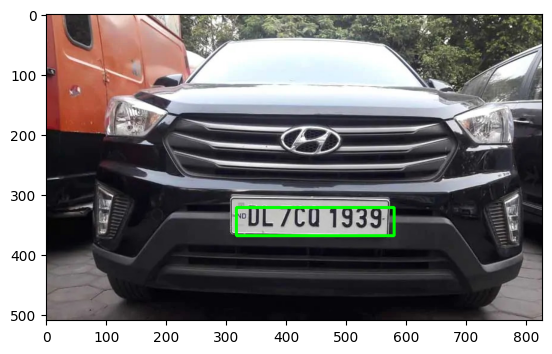

1/1 [==============================] - 0s 163ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


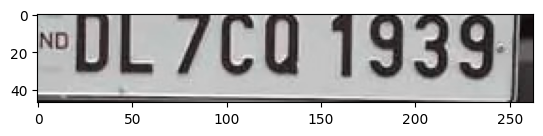

DL 7CU 1939
camera1
13:41:20

2 camera1
1/1 [==============================] - 0s 203ms/step


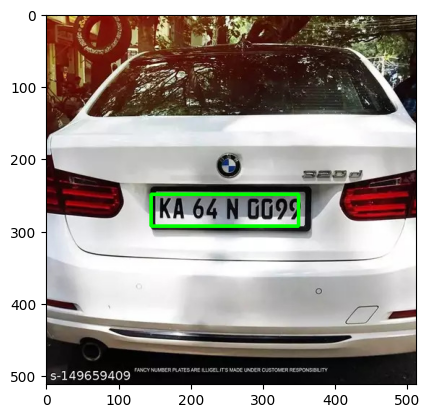

1/1 [==============================] - 0s 213ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


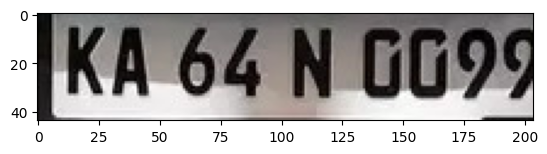

KA 64 N 0099
camera1
13:41:30

3 camera1
1/1 [==============================] - 0s 218ms/step


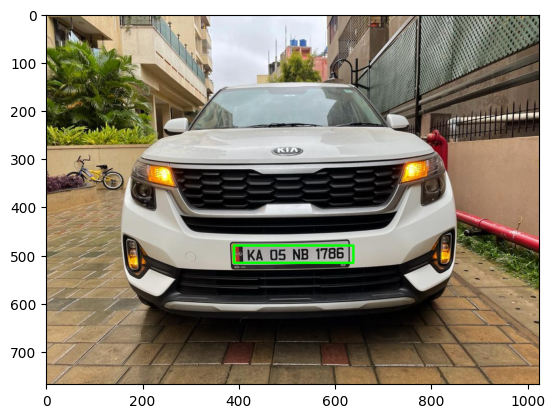

1/1 [==============================] - 0s 243ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


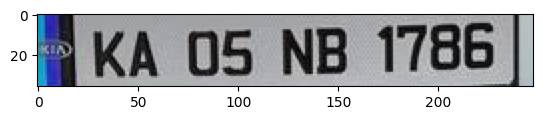

KA 05 NB 1786
camera1
13:41:49

5 camera5
1/1 [==============================] - 0s 215ms/step


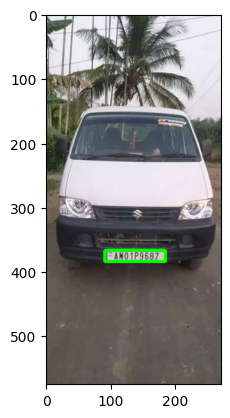

1/1 [==============================] - 0s 183ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


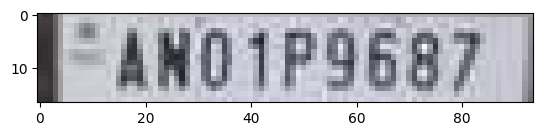

AN01P9687
camera5
13:42:02

6 camera6
1/1 [==============================] - 0s 209ms/step


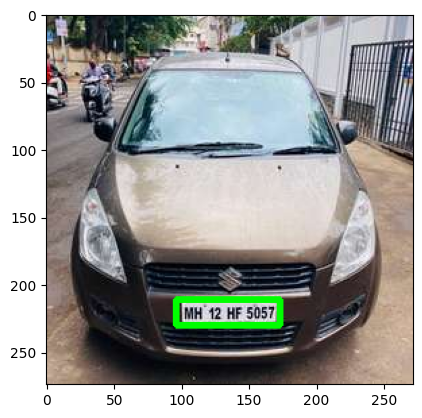

1/1 [==============================] - 0s 212ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


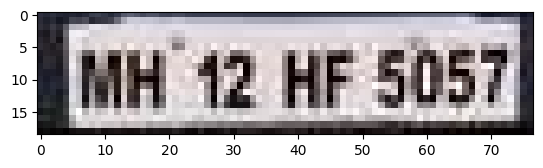

WH 12 HF 5057
camera6
13:42:13

7 camera1
1/1 [==============================] - 0s 207ms/step


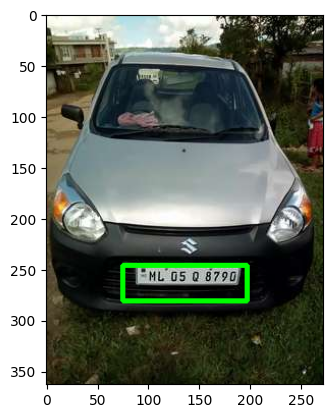

1/1 [==============================] - 0s 236ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


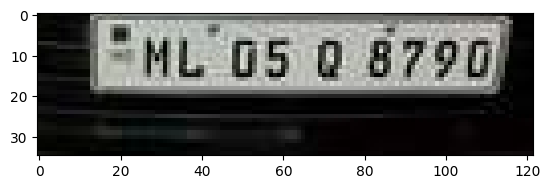

EML 05 Q 8790
camera1
13:42:20

8 camera8
1/1 [==============================] - 0s 214ms/step


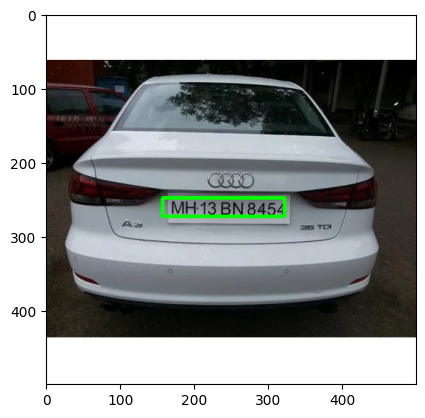

1/1 [==============================] - 0s 238ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


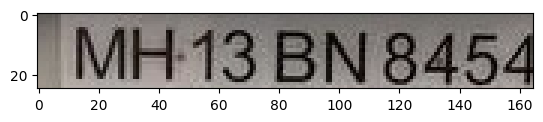

MH 13 BN8454
camera8
13:42:28

9 camera1
1/1 [==============================] - 0s 217ms/step


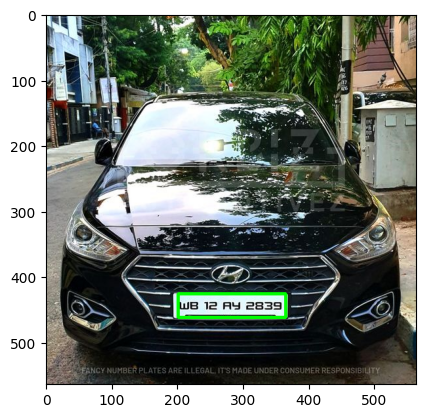

1/1 [==============================] - 0s 155ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


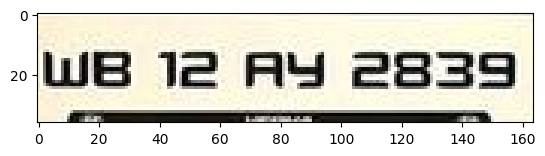

WB 12 AY 2839
camera1
13:44:29

10 camera1
1/1 [==============================] - 0s 217ms/step


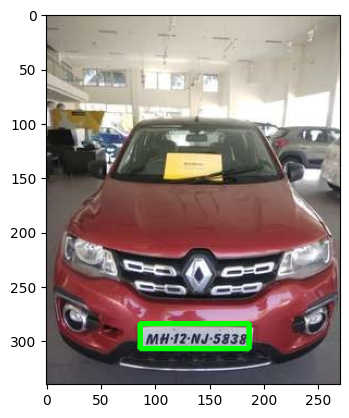

1/1 [==============================] - 0s 225ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


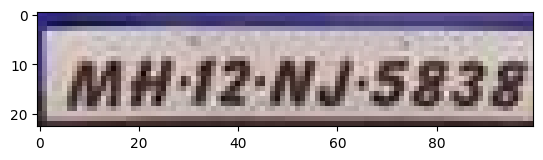

MHIZNJ5838
camera1
13:44:47

11 camera11
1/1 [==============================] - 0s 210ms/step


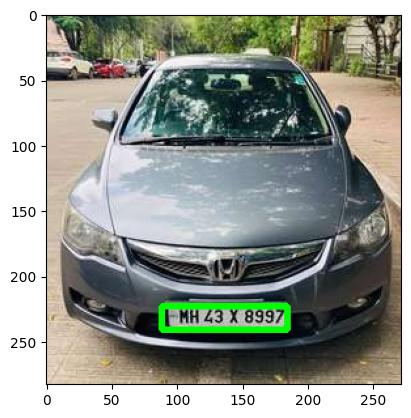

1/1 [==============================] - 0s 151ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


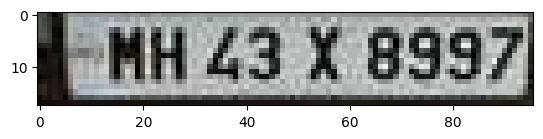

HH L3 X 8997
camera11
13:44:59

12 camera1
1/1 [==============================] - 0s 201ms/step


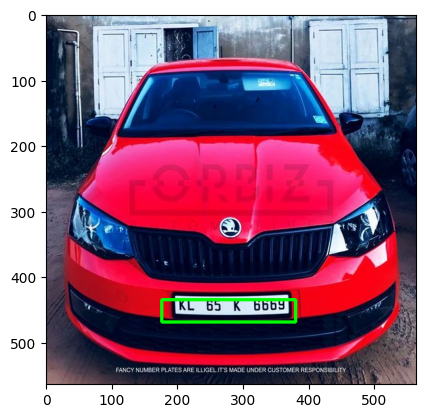

1/1 [==============================] - 0s 202ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


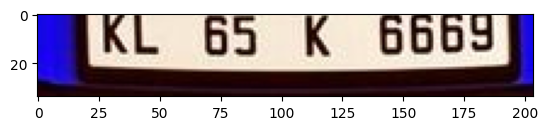

KL 65 K 6669
camera1
13:45:05

13 camera1
1/1 [==============================] - 0s 210ms/step


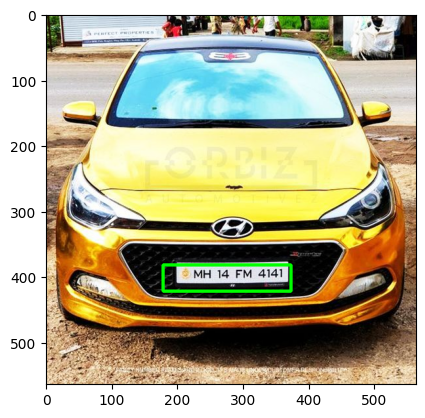

1/1 [==============================] - 0s 174ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


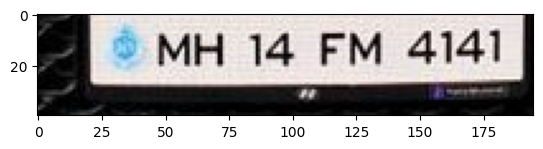

MH 14 FM 4141
camera1
13:45:31

14 camera1
1/1 [==============================] - 0s 214ms/step


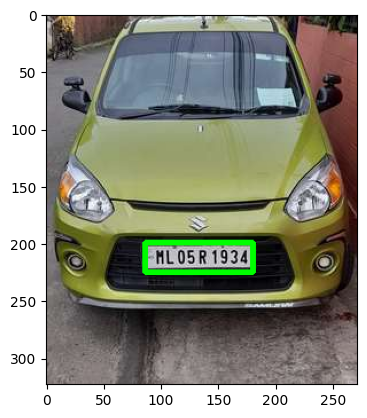

1/1 [==============================] - 0s 206ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


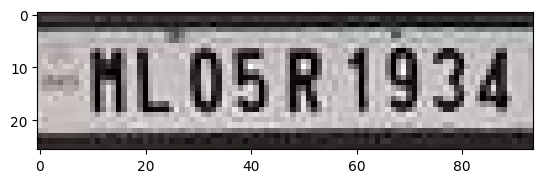

FMLOSR1934
camera1
13:45:40

15 camera1
1/1 [==============================] - 0s 204ms/step


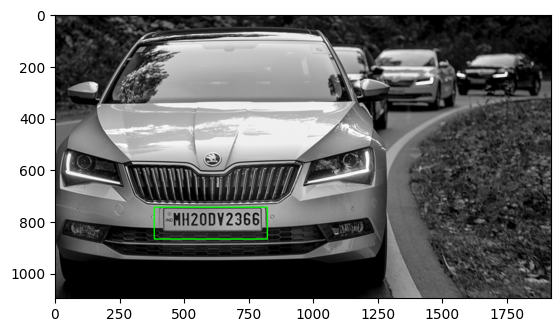

1/1 [==============================] - 0s 148ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


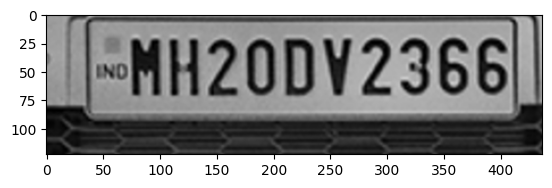

LHHZODV2366
camera1
13:45:47

16 camera1
1/1 [==============================] - 0s 218ms/step


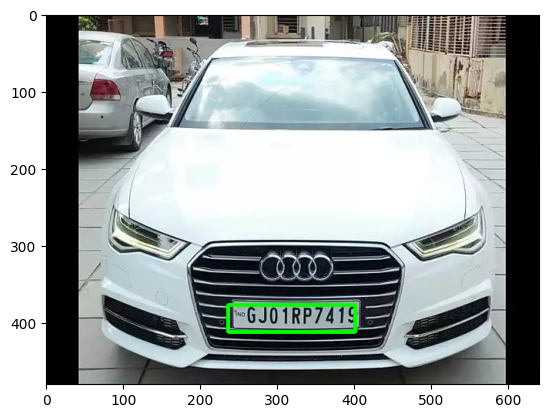

1/1 [==============================] - 0s 195ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


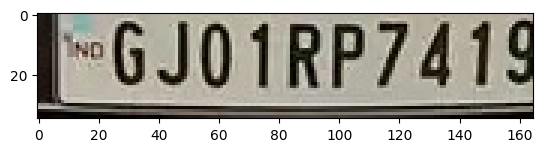

6JO 1RP7419
camera1
13:45:52

17 camera1
1/1 [==============================] - 0s 203ms/step


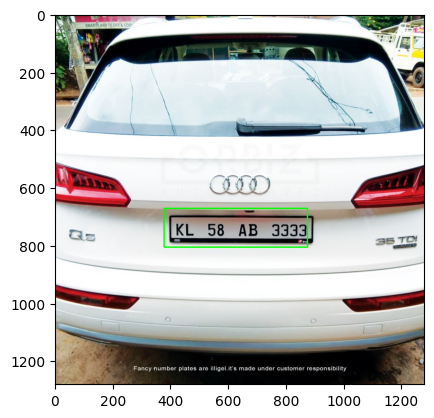

1/1 [==============================] - 0s 156ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


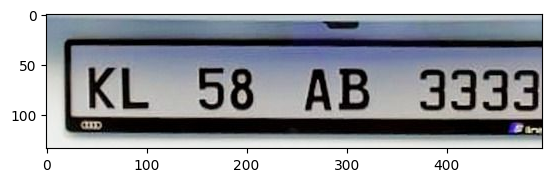

KL 58 AB 3333
camera1
13:46:11

18 camera1
1/1 [==============================] - 0s 209ms/step


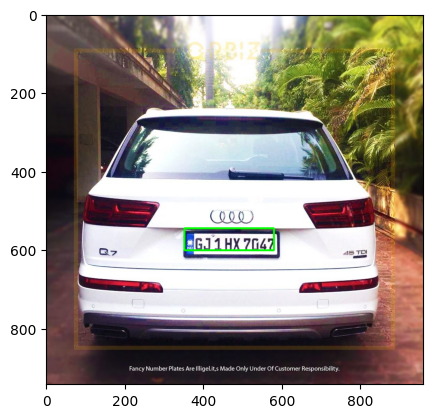

1/1 [==============================] - 0s 141ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


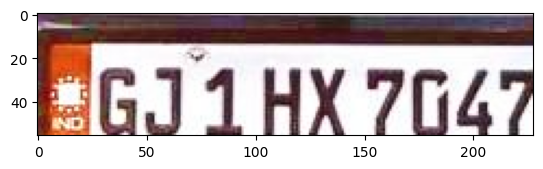

1GJ1HX 7647
camera1
13:46:17

19 camera1
1/1 [==============================] - 0s 222ms/step


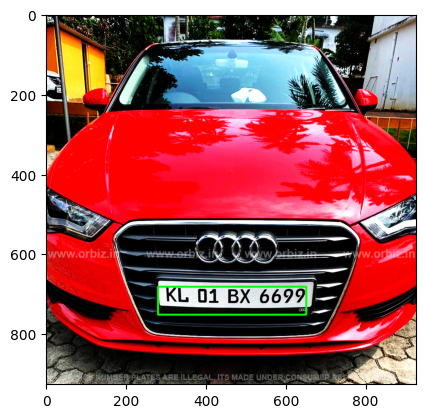

1/1 [==============================] - 0s 223ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


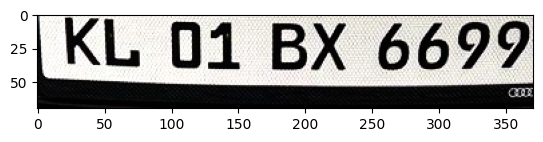

KL 01 BX 6699
camera1
13:46:25

20 camera1
1/1 [==============================] - 0s 250ms/step


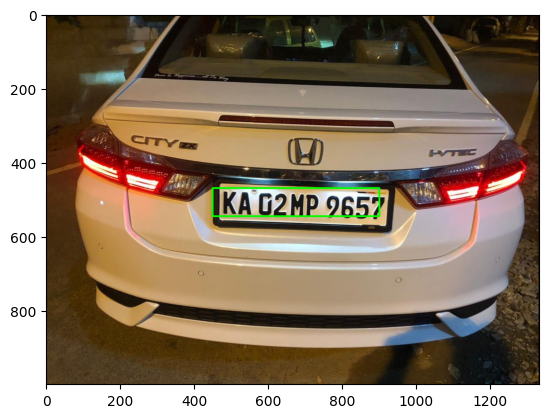

1/1 [==============================] - 0s 208ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


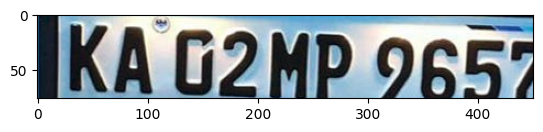

KA C2MP 9657
camera1
13:46:41

21 camera1
1/1 [==============================] - 0s 214ms/step


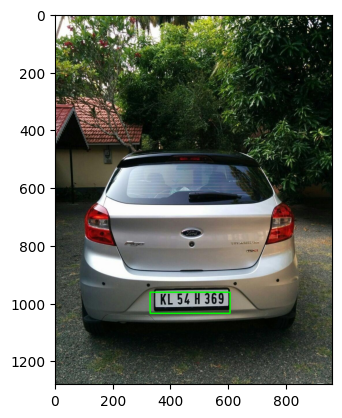

1/1 [==============================] - 0s 188ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


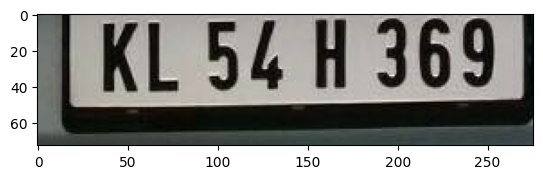

KL 54 4369
camera1
13:46:58

22 camera1
1/1 [==============================] - 0s 210ms/step


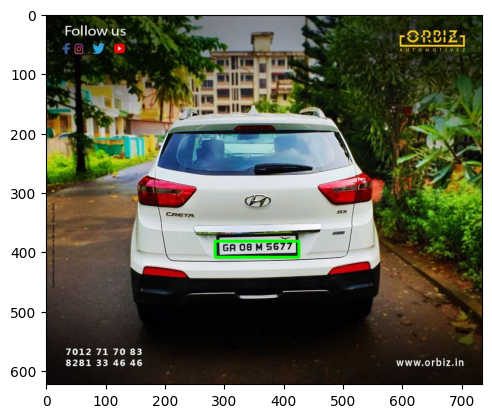

1/1 [==============================] - 0s 213ms/step


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


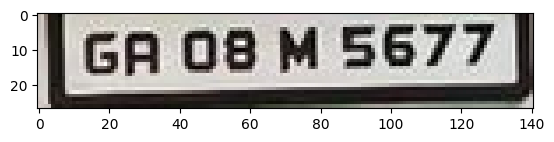

GA 08 M5677
camera1
13:47:18



ValueError: invalid literal for int() with base 10: ''

In [18]:
i = 1
while int(i) > 0:
    i = input("Enter vehicle number: ")
    if int(i) == 0:  
        break
    cam = input("Enter camera number: ")
    cam="camera"+str(cam)
    print(i, cam)
    

    path = f"D:\\automatic-number-plate-recognition-python-yolov8\\anpr\\TEST\\TEST{i}.jpg"
    image = load_img(path)
    image = np.array(image,dtype=np.uint8) 
    image1 = load_img(path,target_size=(224,224))
    image_arr_224 = img_to_array(image1)/255.0 


    h,w,d = image.shape
    # print('Height of the image =',h)
    # print('Width of the image =',w)
    # print(cam)

    test_arr = image_arr_224.reshape(1,224,224,3)
    test_arr.shape
    # print(cam,i)

    coords = model.predict(test_arr)
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    # print(pt1, pt2)

    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    plt.imshow(image)
    plt.show()


    def object_detection(path):
        
        image = load_img(path) 
        image = np.array(image,dtype=np.uint8) 
        image1 = load_img(path,target_size=(224,224))
        
        image_arr_224 = img_to_array(image1)/255.0 
        h,w,d = image.shape
        test_arr = image_arr_224.reshape(1,224,224,3)
        
        coords = model.predict(test_arr)
        
        denorm = np.array([w,w,h,h])
        coords = coords * denorm
        coords = coords.astype(np.int32)
        
        xmin, xmax,ymin,ymax = coords[0]
        pt1 =(xmin,ymin)
        pt2 =(xmax,ymax)
        # print(pt1, pt2)
        cv2.rectangle(image,pt1,pt2,(0,255,0),3)
        return image, coords

    image, cods = object_detection(path)

    img = np.array(load_img(path))
    xmin ,xmax,ymin,ymax = cods[0]
    roi = img[ymin:ymax,xmin:xmax]
    image = roi

    reader = easyocr.Reader(['en'])  

    result = reader.readtext(image, allowlist = ' 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    out=[]
    for detection in result:
        out.append(detection[1])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    text = ' '.join(out)
    # print(text)    

    now = datetime.now()
    # # print('The date and time(greenwich standard time) of entry of vehicle is: ', now)

    # # Convert now to string
    # now_string = now.strftime('%Y-%m-%d %H:%M:%S')
    now_string = now.strftime('%H:%M:%S')
    # print('Current time:', now_string)



    f = open("myfile.txt" , "w")
    f.write(text +"\n")
    f.write(cam + "\n")
    f.write(now_string + "\n")
    f = open("myfile.txt" , "r")
    print(f.read())